#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#### Loading the dataset

In [2]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


#### Information about the columns

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


#### Count no of CG & OR

In [4]:
df["label"].value_counts().to_frame()

,count
label,
CG,20216
OR,20216


#### Count no of ratings each label has

In [5]:
df.groupby('label')['rating'].value_counts().sort_index(ascending=True).to_frame()


count
label rating       
CG    1.0      1063
      2.0       962
      3.0      1952
      4.0      3920
      5.0     12319
OR    1.0      1092
      2.0      1005
      3.0      1834
      4.0      4045
      5.0     12240

#### Count the category where the ratings are taken from

In [7]:
df["category"].value_counts().to_frame()


,count
category,
Kindle_Store_5,4730
Books_5,4370
Pet_Supplies_5,4254
Home_and_Kitchen_5,4056
Electronics_5,3988
Sports_and_Outdoors_5,3946
Tools_and_Home_Improvement_5,3858
Clothing_Shoes_and_Jewelry_5,3848
Toys_and_Games_5,3794


#### Total Rows and columns

In [8]:
#TOTAL ROWS AND COLUMNS
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  40432
Total Attributes:  4


## EDA

In [9]:
df.groupby('label').describe()

rating                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0

In [10]:
#SETTING SEABORN STYLE
sns.set_style('darkgrid')

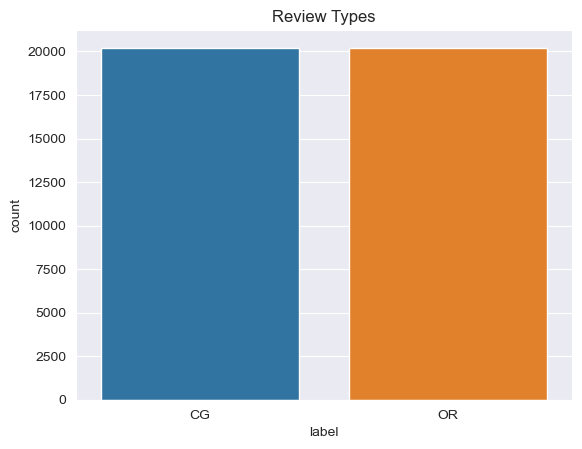

In [11]:
sns.countplot(x ='label', 
              data = df).set_title("Review Types")
plt.show()

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Text Preprocessing

#### Removing Duplicates


In [15]:
#CHECK TOTAL DUPLICATE OCCURENCES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  12


In [16]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40420 entries, 0 to 40419
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40420 non-null  object 
 1   rating    40420 non-null  float64
 2   label     40420 non-null  object 
 3   text_     40420 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [17]:
dup = df.duplicated().sum()
print("Number of duplicates after removing in dataset: ", dup)

Number of duplicates after removing in dataset:  0


#### NULL Values


In [18]:
df.isnull().sum()


category    0
rating      0
label       0
text_       0
dtype: int64

#### Summary Statistics


In [19]:
df.describe()

,rating
count,40420.000000
mean,4.256358
std,1.144452
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### removing stopwords, punctuations, special charas



In [20]:
def text_preprocessing(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    
    # Load stopwords
    stop_words = set(stopwords.words('english'))

    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()
    
    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []
    
    for token in tokens:
        if token not in stop_words:
            cleaned.append(token)
            
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)


In [21]:
import re
from nltk.stem import PorterStemmer


In [22]:
df['text_'] = df['text_'].apply(text_preprocessing)


In [23]:
df['text_'].head(5)

0    love well made sturdi comfort love pretti
1     love great upgrad origin mine coupl year
2       pillow save back love look feel pillow
3          miss inform use great product price
4          nice set good qualiti set two month
Name: text_, dtype: object

#### Word Cloud

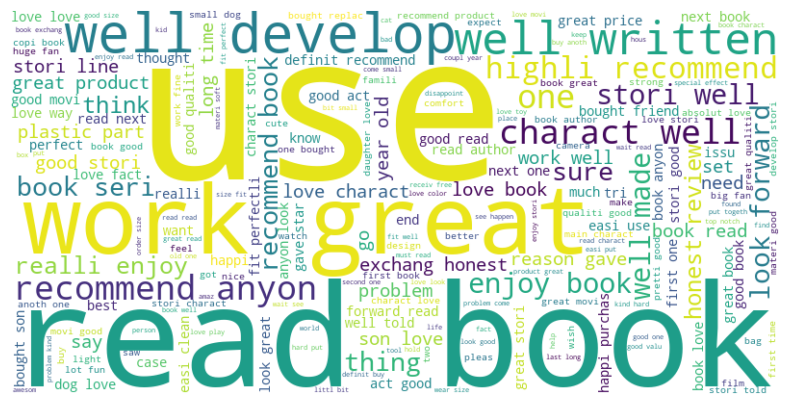

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the text associated with the "CG" label
cg_text = ' '.join(df[df['label'] == 'CG']['text_'])

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cg_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


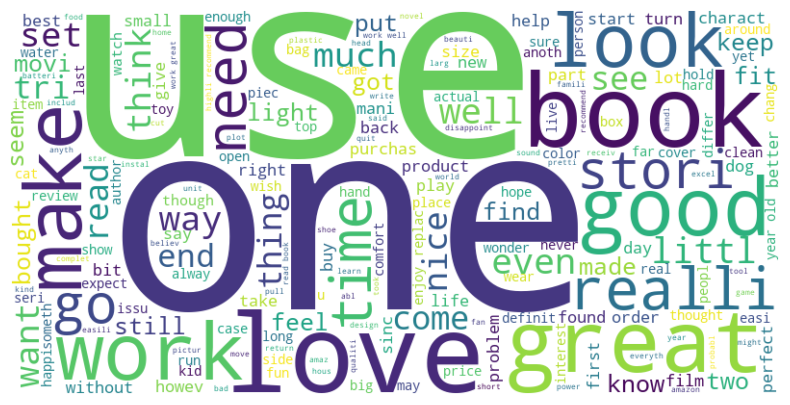

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the text associated with the "CG" label
cg_text = ' '.join(df[df['label'] == 'OR']['text_'])

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cg_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Labelling CG /OR

In [25]:
# Define a mapping dictionary
label_mapping = {'CG': 0, 'OR': 1} 

In [26]:
# Map the labels to numerical values
df['label_indexing'] = df['label'].map(label_mapping)

In [27]:
df.head(100)

,category,rating,label,text_,label_indexing
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love pretti,0
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin mine coupl year,0
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow,0
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price,0
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month,0
...,...,...,...,...,...
95,Home_and_Kitchen_5,2.0,OR,weak bare bring air,1
96,Home_and_Kitchen_5,5.0,OR,great set glass good qualiti comfort handl,1
97,Home_and_Kitchen_5,4.0,OR,feel cool touch super hard,1
98,Home_and_Kitchen_5,5.0,OR,cute made well grand daughter love,1


#### DATA SPLITTING

In [28]:
#ASSIGN THE VARIABLES
X = df['text_'] #input var
y = df['label_indexing'] #target var

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [30]:
entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 40420
Train dataset: 28294
Test dataset: 12126


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [32]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix


#### TFIDF

In [33]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#### Naive Bayes classifier


In [38]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

In [39]:
nb_train_predictions = nb_classifier.predict(X_train_tfidf)

In [40]:
nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
print("Naive Bayes Training Accuracy:", nb_train_accuracy)
nb_test_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_test_accuracy)

Naive Bayes Training Accuracy: 0.8714921891567117
Naive Bayes Accuracy: 0.8420748804222332


In [41]:
# Classification report
nb_classification_report = classification_report(y_test, nb_predictions)
print("Naive Bayes Classification Report:\n", nb_classification_report)

# Confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:\n", nb_conf_matrix)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      6073
           1       0.89      0.78      0.83      6053

    accuracy                           0.84     12126
   macro avg       0.85      0.84      0.84     12126
weighted avg       0.85      0.84      0.84     12126

Naive Bayes Confusion Matrix:
 [[5473  600]
 [1315 4738]]


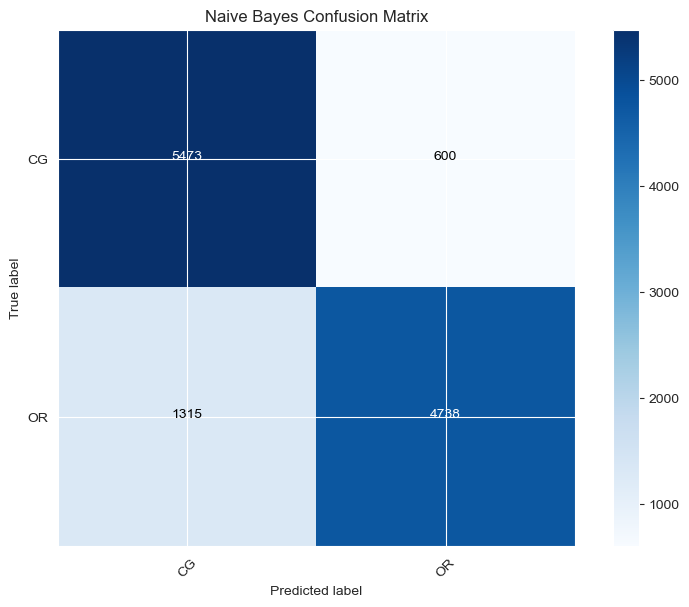

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have classes defined
classes = ["CG", "OR"]  # Replace with your actual class labels

# Assuming nb_conf_matrix is your confusion matrix
plot_confusion_matrix(nb_conf_matrix, classes, title='Naive Bayes Confusion Matrix')
plt.show()


#### Support Vector Machine classifier


In [45]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

In [46]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8692066633679697


In [47]:
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:\n", svm_classification_report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6073
           1       0.87      0.87      0.87      6053

    accuracy                           0.87     12126
   macro avg       0.87      0.87      0.87     12126
weighted avg       0.87      0.87      0.87     12126



In [49]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)


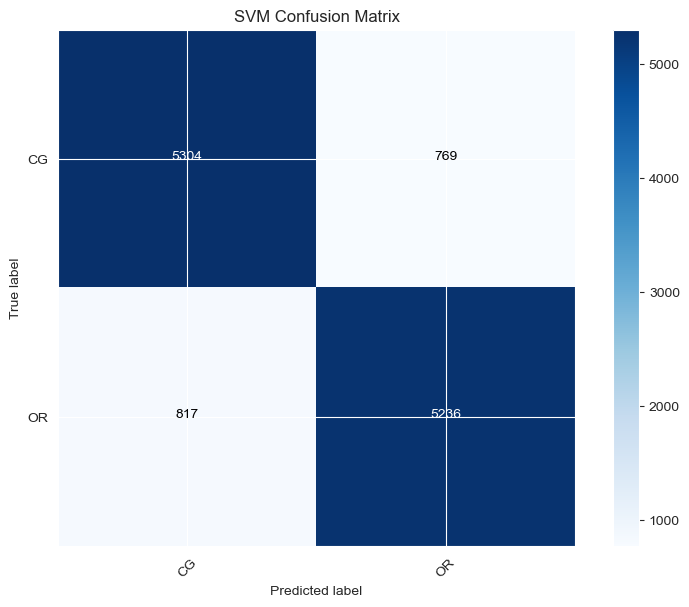

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have classes defined
classes = ["CG", "OR"]  # Replace with your actual class labels

# Assuming nb_conf_matrix is your confusion matrix
plot_confusion_matrix(svm_conf_matrix, classes, title='SVM Confusion Matrix')
plt.show()


## Bagging Naive Bayes

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Bagging with Naive Bayes as base estimator
bagging_nb_classifier = BaggingClassifier()
bagging_nb_classifier.base_estimator = nb_classifier
bagging_nb_classifier.fit(X_train_tfidf, y_train)
bagging_nb_predictions = bagging_nb_classifier.predict(X_test_tfidf)


In [52]:
bagging_nb_accuracy = accuracy_score(y_test, bagging_nb_predictions)
print("Bagging (Naive Bayes) Accuracy:", bagging_nb_accuracy)


Bagging (Naive Bayes) Accuracy: 0.8024905162460828


In [53]:
bagging_nb_classification_report = classification_report(y_test, bagging_nb_predictions)
print("Bagging NB Classification Report:\n", bagging_nb_classification_report)
bagging_nb_conf_matrix = confusion_matrix(y_test, bagging_nb_predictions)


Bagging NB Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      6073
           1       0.84      0.75      0.79      6053

    accuracy                           0.80     12126
   macro avg       0.81      0.80      0.80     12126
weighted avg       0.81      0.80      0.80     12126



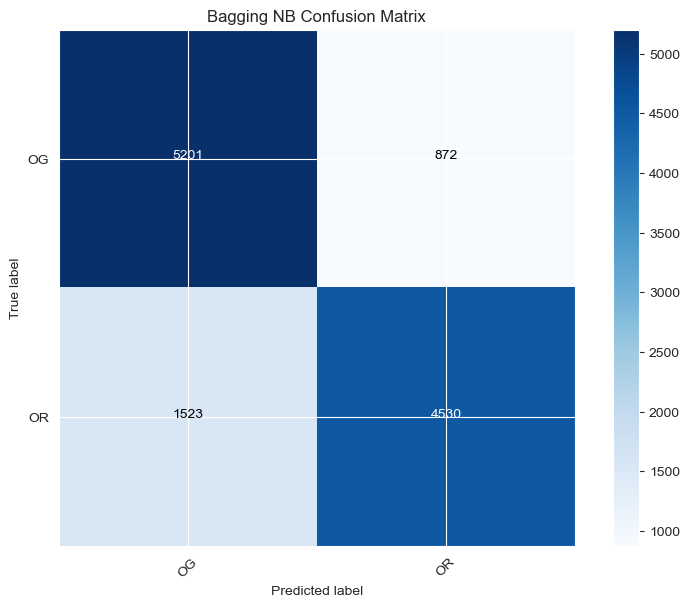

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have classes defined
classes = ["OG", "OR"]  # Replace with your actual class labels

# Assuming nb_conf_matrix is your confusion matrix
plot_confusion_matrix(bagging_nb_conf_matrix, classes, title='Bagging NB Confusion Matrix')
plt.show()


#### AdaBoost classifier


In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Create an AdaBoostClassifier with Naive Bayes as base estimator
adaboost_nb_classifier = AdaBoostClassifier()
adaboost_nb_classifier.base_estimator = nb_classifier
adaboost_nb_classifier.fit(X_train_tfidf, y_train)
adaboost_nb_predictions = adaboost_nb_classifier.predict(X_test_tfidf)


In [57]:
adaboost_nb_accuracy = accuracy_score(y_test, adaboost_nb_predictions)
print("AdaBoost (Naive Bayes) Accuracy:", adaboost_nb_accuracy)


AdaBoost (Naive Bayes) Accuracy: 0.7681015998680522


In [58]:
adaboost_nb_classification_report = classification_report(y_test, adaboost_nb_predictions)
print("Adaboost NB Classification Report:\n", adaboost_nb_classification_report)
adaboost_nb_conf_matrix = confusion_matrix(y_test, adaboost_nb_predictions)


Adaboost NB Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      6073
           1       0.75      0.81      0.78      6053

    accuracy                           0.77     12126
   macro avg       0.77      0.77      0.77     12126
weighted avg       0.77      0.77      0.77     12126



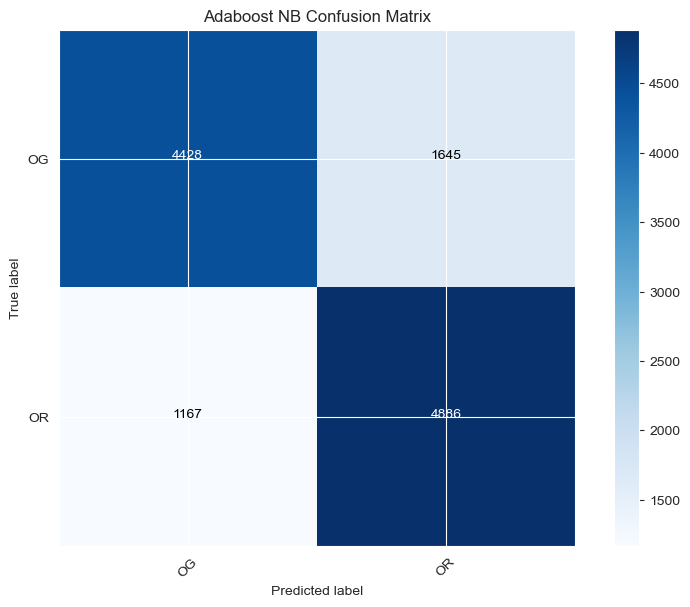

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have classes defined
classes = ["OG", "OR"]  # Replace with your actual class labels

# Assuming nb_conf_matrix is your confusion matrix
plot_confusion_matrix(adaboost_nb_conf_matrix, classes, title='Adaboost NB Confusion Matrix')
plt.show()


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)


In [63]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8452086425861784


In [64]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Random forest Classification Report:\n", rf_classification_report)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)


Random forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      6073
           1       0.88      0.80      0.84      6053

    accuracy                           0.85     12126
   macro avg       0.85      0.85      0.84     12126
weighted avg       0.85      0.85      0.84     12126



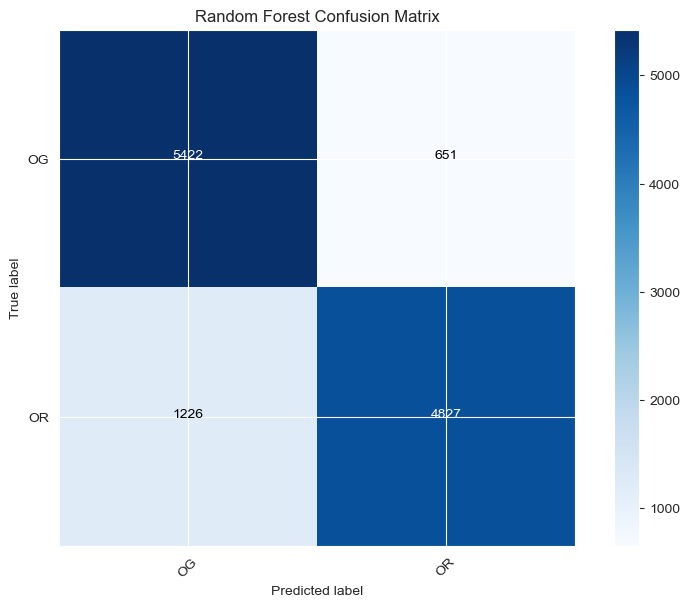

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have classes defined
classes = ["OG", "OR"]  # Replace with your actual class labels

# Assuming nb_conf_matrix is your confusion matrix
plot_confusion_matrix(rf_conf_matrix, classes, title='Random Forest Confusion Matrix')
plt.show()


## Voting classifier

In [66]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier

voting_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('svm', svm_classifier),
    ('ada', adaboost_nb_classifier)
], voting='hard')
voting_classifier.fit(X_train_tfidf, y_train)
voting_predictions = voting_classifier.predict(X_test_tfidf)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print("Voting Classifier Accuracy:", voting_accuracy)

Voting Classifier Accuracy: 0.8632690087415471


In [67]:
voting_classification_report = classification_report(y_test, voting_predictions)
print("Random forest Classification Report:\n", voting_classification_report)
voting_conf_matrix = confusion_matrix(y_test, voting_predictions)


Random forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      6073
           1       0.87      0.85      0.86      6053

    accuracy                           0.86     12126
   macro avg       0.86      0.86      0.86     12126
weighted avg       0.86      0.86      0.86     12126



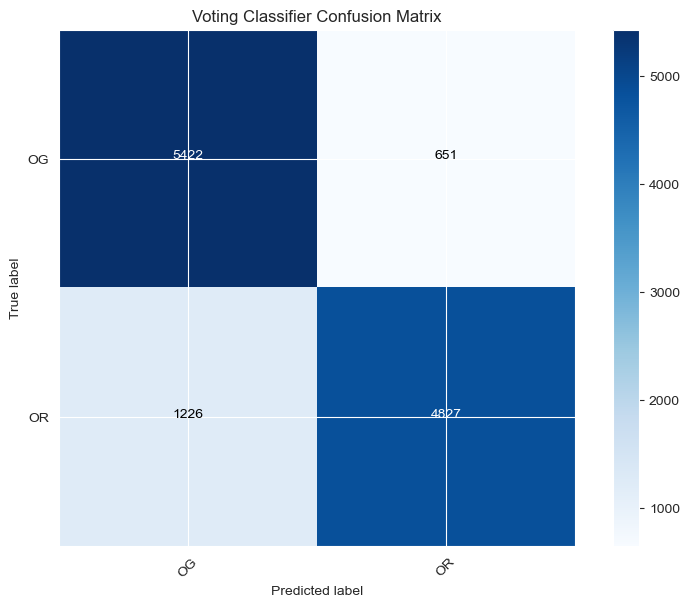

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have classes defined
classes = ["OG", "OR"]  # Replace with your actual class labels

# Assuming nb_conf_matrix is your confusion matrix
plot_confusion_matrix(rf_conf_matrix, classes, title='Voting Classifier Confusion Matrix')
plt.show()


## BILSTM

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad sequences to ensure uniform length
max_len = 100 # Choose a maximum length for the sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.3)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

2024-05-09 23:00:29.234992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
619/619 [==============================] - 50s 76ms/step - loss: 0.3546 - accuracy: 0.8340 - val_loss: 0.2587 - val_accuracy: 0.8985
Epoch 2/10
619/619 [==============================] - 46s 75ms/step - loss: 0.1924 - accuracy: 0.9227 - val_loss: 0.2379 - val_accuracy: 0.9052
Epoch 3/10
619/619 [==============================] - 44s 72ms/step - loss: 0.1356 - accuracy: 0.9468 - val_loss: 0.2517 - val_accuracy: 0.8999
Epoch 4/10
619/619 [==============================] - 47s 76ms/step - loss: 0.0920 - accuracy: 0.9653 - val_loss: 0.2896 - val_accuracy: 0.8994
Epoch 5/10
619/619 [==============================] - 47s 75ms/step - loss: 0.0651 - accuracy: 0.9763 - val_loss: 0.3752 - val_accuracy: 0.8967
Epoch 6/10
619/619 [==============================] - 64s 103ms/step - loss: 0.0616 - accuracy: 0.9774 - val_loss: 0.3791 - val_accuracy: 0.8847
Epoch 7/10
619/619 [==============================] - 70s 113ms/step - loss: 0.0452 - accuracy: 0.9841 - val_loss: 0.4705 - val_accurac

379/379 [==============================] - 7s 15ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6073
           1       0.91      0.84      0.87      6053

    accuracy                           0.88     12126
   macro avg       0.88      0.88      0.88     12126
weighted avg       0.88      0.88      0.88     12126



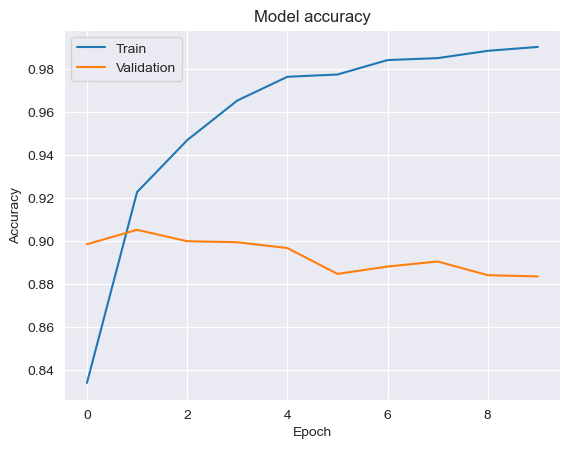

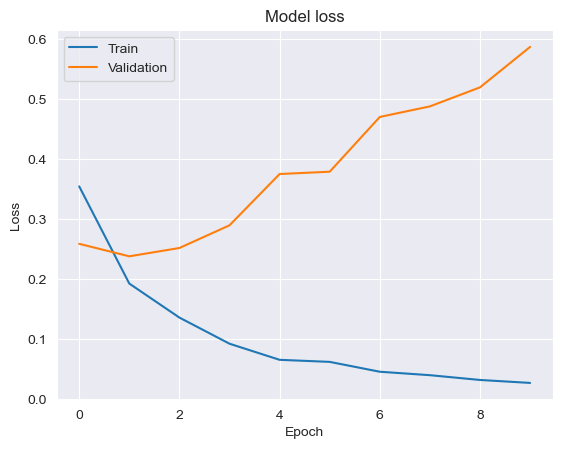

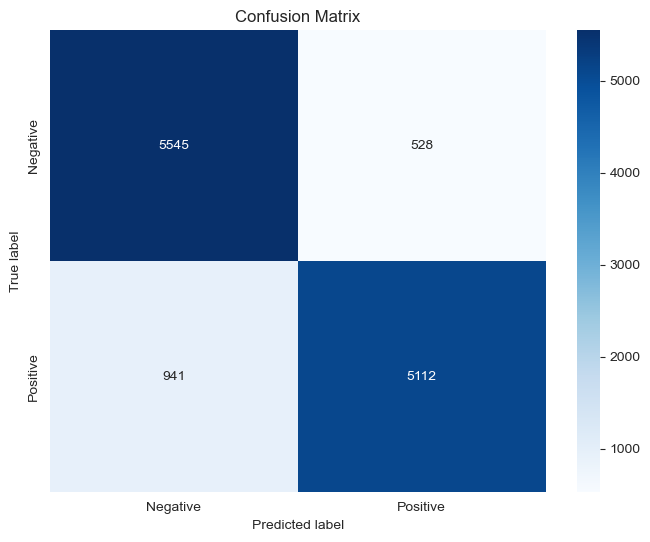

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


## CNN

In [35]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

# Define the model
model_cnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.3)
# Evaluate the model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy_cnn)

Epoch 1/10
619/619 [==============================] - 28s 43ms/step - loss: 0.3527 - accuracy: 0.8341 - val_loss: 0.2336 - val_accuracy: 0.9022
Epoch 2/10
619/619 [==============================] - 27s 43ms/step - loss: 0.1567 - accuracy: 0.9391 - val_loss: 0.2390 - val_accuracy: 0.9092
Epoch 3/10
619/619 [==============================] - 25s 41ms/step - loss: 0.0742 - accuracy: 0.9718 - val_loss: 0.2844 - val_accuracy: 0.9021
Epoch 4/10
619/619 [==============================] - 25s 40ms/step - loss: 0.0325 - accuracy: 0.9881 - val_loss: 0.4210 - val_accuracy: 0.8993
Epoch 5/10
619/619 [==============================] - 25s 40ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.4471 - val_accuracy: 0.9007
Epoch 6/10
619/619 [==============================] - 26s 42ms/step - loss: 0.0199 - accuracy: 0.9926 - val_loss: 0.5071 - val_accuracy: 0.9006
Epoch 7/10
619/619 [==============================] - 26s 42ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.5448 - val_accuracy:

379/379 [==============================] - 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6073
           1       0.87      0.90      0.89      6053

    accuracy                           0.89     12126
   macro avg       0.89      0.89      0.89     12126
weighted avg       0.89      0.89      0.89     12126



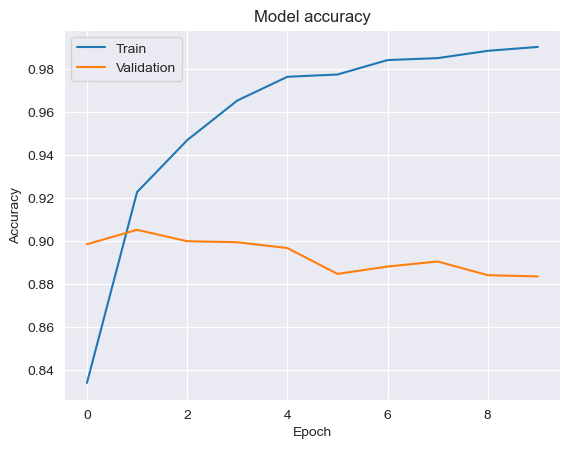

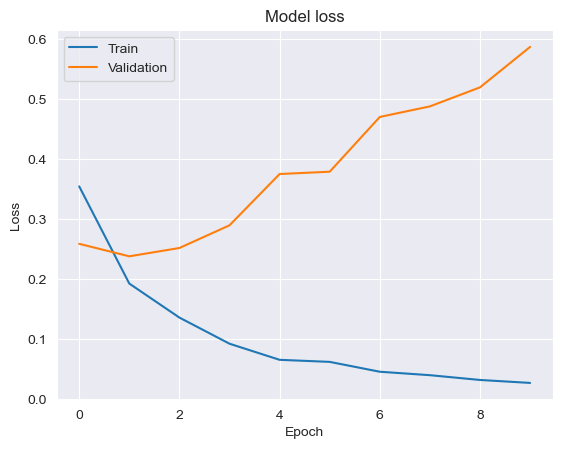

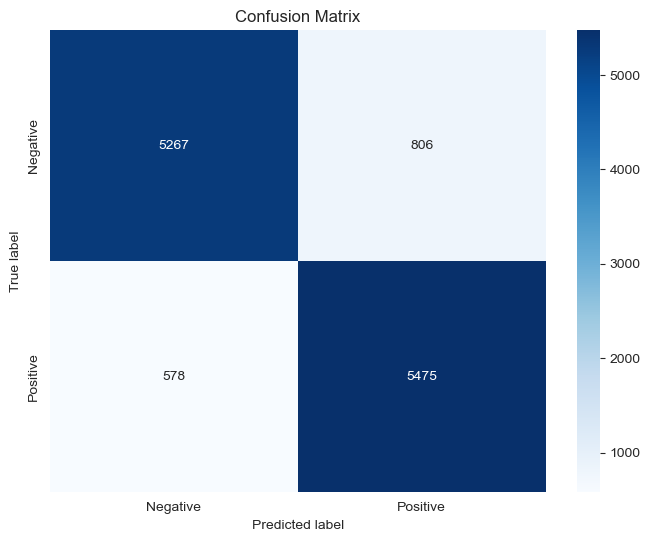

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
y_pred_prob = model_cnn.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
